<a href="https://colab.research.google.com/github/li-monogatarui/UC_predict/blob/main/MATH352.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
occu <- read.csv("occupancy_short_names.csv")

In [4]:
head(occu)

,Day,Date,Headcount,Time,DaysSinceStart,TableRentals,VideoRentals,BoardRentals,TotalRentals,TableDur,VideoDur,BoardDur,TotalDur,MinutesSinceOpen
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Thursday,8/24/2023,2,12:15,1,10,0,0,10,327,0,0,327,150
2,Thursday,8/24/2023,2,12:40,1,10,0,0,10,327,0,0,327,175
3,Thursday,8/24/2023,0,13:00,1,10,0,0,10,327,0,0,327,195
4,Thursday,8/24/2023,2,13:17,1,10,0,0,10,327,0,0,327,212
5,Thursday,8/24/2023,3,13:35,1,10,0,0,10,327,0,0,327,230
6,Thursday,8/24/2023,6,14:15,1,10,0,0,10,327,0,0,327,270


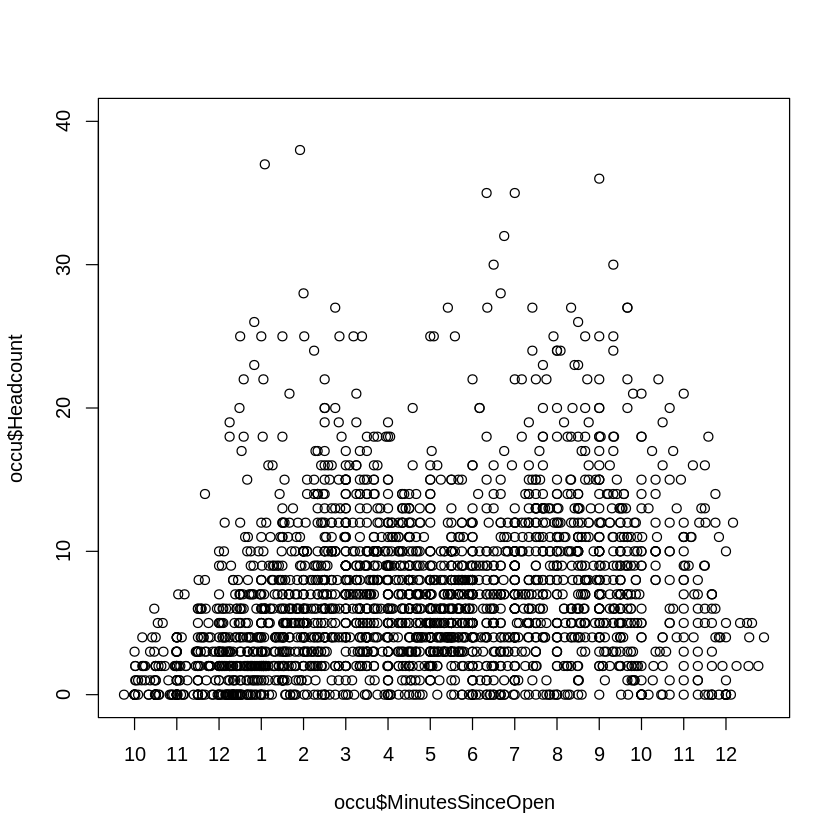

In [5]:
#making a plot with hour axis
plot(occu$MinutesSinceOpen, occu$Headcount, ylim=c(0,40), xaxt='n')
axis(1, at=c(15,75,135,195,255,315,375,435,495,555,615,675,735,795,855), labels=c(10,11,12,1,2,3,4,5,6,7,8,9,10,11,12))

In [6]:
#trying out some dinky models
basic_model <- lm(Headcount ~ I(DaysSinceStart^2), data=occu)
summary(lm(Headcount ~ DaysSinceStart + MinutesSinceOpen, data=occu))


Call:
lm(formula = Headcount ~ DaysSinceStart + MinutesSinceOpen, data = occu)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.065  -3.682  -0.929   2.643  57.336 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.7621778  0.3357368  17.163  < 2e-16 ***
DaysSinceStart   -0.0271107  0.0035224  -7.697 2.02e-14 ***
MinutesSinceOpen  0.0065193  0.0005831  11.180  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.825 on 2418 degrees of freedom
Multiple R-squared:  0.07144,	Adjusted R-squared:  0.07068 
F-statistic: 93.02 on 2 and 2418 DF,  p-value: < 2.2e-16


In [100]:
all_model <- lm(Headcount ~ (Day + DaysSinceStart + MinutesSinceOpen + TotalRentals + TotalDur)^2
                + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + I(TotalRentals^2) + I(TotalDur^2),
                data = occu)

In [101]:
summary(all_model)


Call:
lm(formula = Headcount ~ (Day + DaysSinceStart + MinutesSinceOpen + 
    TotalRentals + TotalDur)^2 + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + 
    I(TotalRentals^2) + I(TotalDur^2), data = occu)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.188  -3.014  -0.475   2.331  52.698 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.178e+00  3.061e+00  -0.711 0.476887    
DayMonday                       -3.742e+00  2.230e+00  -1.678 0.093443 .  
DaySaturday                     -5.432e+00  2.337e+00  -2.324 0.020196 *  
DaySunday                       -5.552e+00  2.503e+00  -2.218 0.026634 *  
DayThursday                     -2.262e-01  2.549e+00  -0.089 0.929295    
DayTuesday                      -2.296e+00  2.457e+00  -0.934 0.350347    
DayWednesday                     1.366e+00  2.758e+00   0.495 0.620549    
DaysSinceStart                   2.830e-03  4.076e-02   0.069 0.944654    
MinutesS

In [102]:
step(all_model, direction = "backward")

Start:  AIC=7994.54
Headcount ~ (Day + DaysSinceStart + MinutesSinceOpen + TotalRentals + 
    TotalDur)^2 + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + 
    I(TotalRentals^2) + I(TotalDur^2)

                                  Df Sum of Sq   RSS    AIC
- Day:MinutesSinceOpen             6     118.1 63499 7987.0
- MinutesSinceOpen:TotalRentals    1      13.6 63395 7993.1
- DaysSinceStart:MinutesSinceOpen  1      26.5 63408 7993.5
- I(DaysSinceStart^2)              1      48.8 63430 7994.4
<none>                                         63381 7994.5
- I(TotalDur^2)                    1     135.1 63516 7997.7
- TotalRentals:TotalDur            1     173.4 63555 7999.1
- MinutesSinceOpen:TotalDur        1     177.4 63559 7999.3
- I(TotalRentals^2)                1     185.4 63567 7999.6
- DaysSinceStart:TotalDur          1     262.7 63644 8002.5
- Day:DaysSinceStart               6     553.1 63934 8003.6
- DaysSinceStart:TotalRentals      1     438.6 63820 8009.2
- Day:TotalDur           


Call:
lm(formula = Headcount ~ Day + DaysSinceStart + MinutesSinceOpen + 
    TotalRentals + TotalDur + I(MinutesSinceOpen^2) + I(TotalRentals^2) + 
    I(TotalDur^2) + Day:DaysSinceStart + Day:TotalRentals + Day:TotalDur + 
    DaysSinceStart:TotalRentals + DaysSinceStart:TotalDur + MinutesSinceOpen:TotalDur + 
    TotalRentals:TotalDur, data = occu)

Coefficients:
                (Intercept)                    DayMonday  
                 -5.700e+00                   -2.763e+00  
                DaySaturday                    DaySunday  
                 -4.429e+00                   -4.430e+00  
                DayThursday                   DayTuesday  
                  1.545e+00                   -1.421e+00  
               DayWednesday               DaysSinceStart  
                  3.789e+00                    5.524e-02  
           MinutesSinceOpen                 TotalRentals  
                  2.554e-02                    5.372e-01  
                   TotalDur        I(Min

In [129]:
new_model <- lm(formula = Headcount ~ Day + DaysSinceStart + MinutesSinceOpen +
    TotalRentals + TotalDur + I(MinutesSinceOpen^2) + I(TotalRentals^2) +
    I(TotalDur^2) + Day:DaysSinceStart + Day:TotalRentals + Day:TotalDur +
    DaysSinceStart:TotalRentals + DaysSinceStart:TotalDur + MinutesSinceOpen:TotalDur +
    TotalRentals:TotalDur, data = occu)

summary(new_model)


Call:
lm(formula = Headcount ~ Day + DaysSinceStart + MinutesSinceOpen + 
    TotalRentals + TotalDur + I(MinutesSinceOpen^2) + I(TotalRentals^2) + 
    I(TotalDur^2) + Day:DaysSinceStart + Day:TotalRentals + Day:TotalDur + 
    DaysSinceStart:TotalRentals + DaysSinceStart:TotalDur + MinutesSinceOpen:TotalDur + 
    TotalRentals:TotalDur, data = occu)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.633  -3.003  -0.536   2.274  52.999 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -5.700e+00  2.448e+00  -2.328 0.019972 *  
DayMonday                   -2.763e+00  1.953e+00  -1.414 0.157408    
DaySaturday                 -4.429e+00  2.222e+00  -1.994 0.046304 *  
DaySunday                   -4.430e+00  2.299e+00  -1.926 0.054172 .  
DayThursday                  1.545e+00  2.244e+00   0.689 0.491149    
DayTuesday                  -1.421e+00  2.279e+00  -0.624 0.532879    
DayWednesday                 3.789e+00 

In [130]:
res <- resid(new_model)

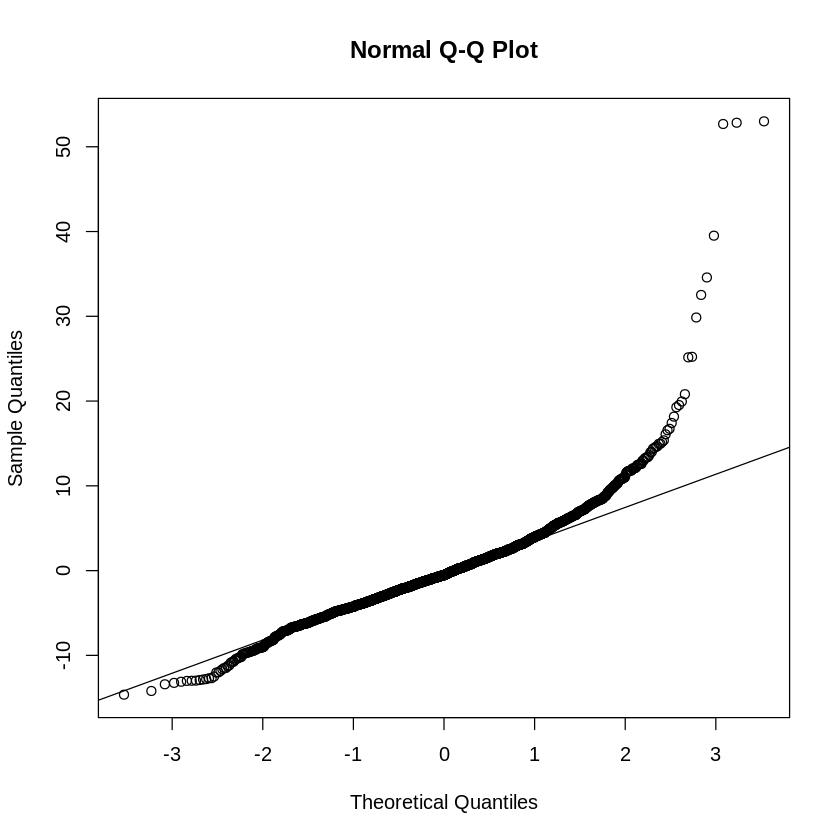

In [131]:
qqnorm(res)
qqline(res)

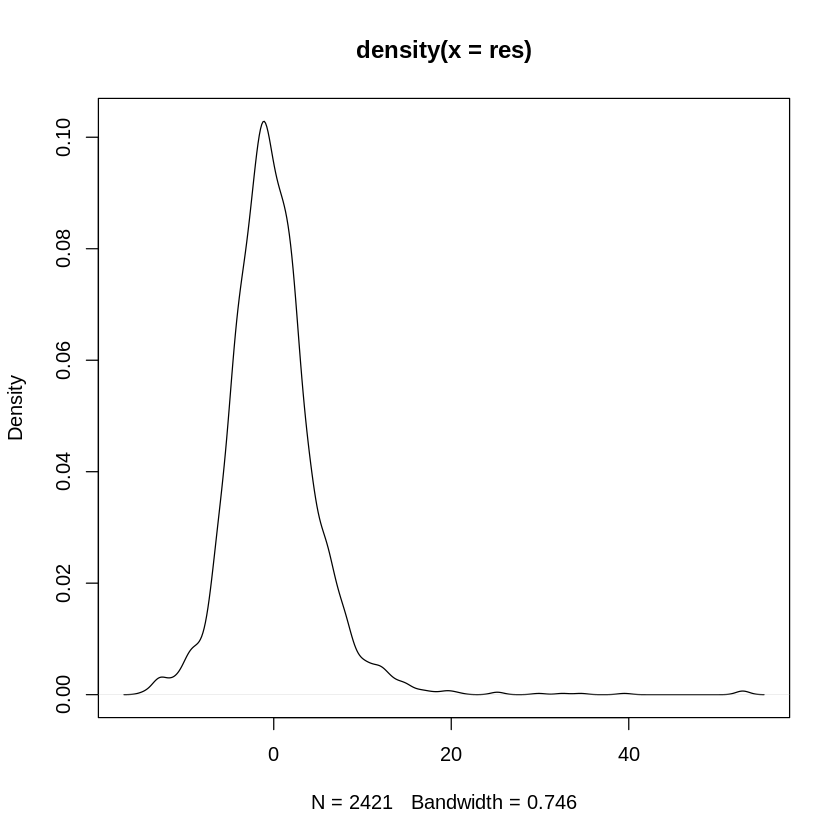

In [132]:
plot(density(res))